In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import mplleaflet as mpl

In [3]:
path = "C:/Users/aroy29/Dropbox (ASU)/Strava Analysis/Data/"
mag_strava_comp = pd.read_csv(path + "MAG2016/Analysis_Generated_Data/MAG-Strava-counts with additional covariates.csv")
mag_bike_sites = gpd.read_file(path + "MAG2016/MAG_Official_counts/MAG2015_16/Bike_Counts_2015_16.shp")
mag_census_blocks = gpd.read_file(path + "Arizona_ACS_2016_Block_Groups/Arizona_ACS_2016_Block_Groups.shp") 

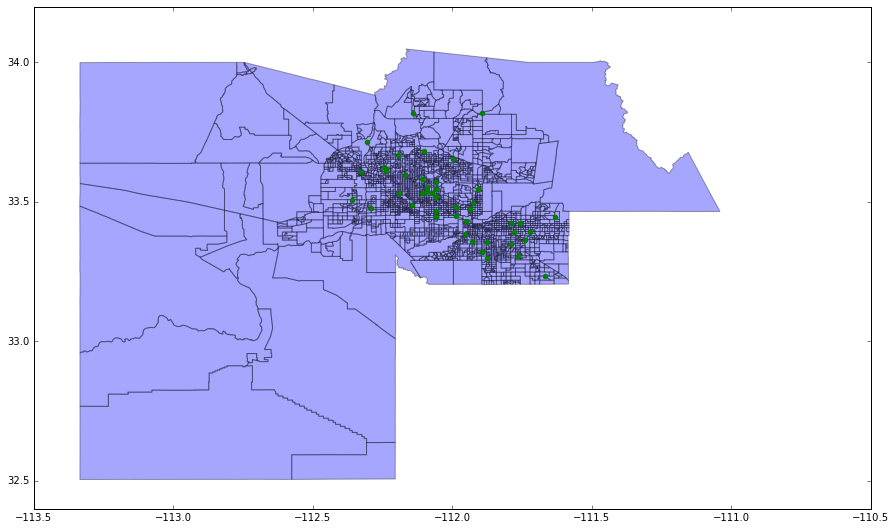

In [3]:
mag_bike_sites = mag_bike_sites.to_crs({'init': u'epsg:4326'})
mag_census_blocks = mag_census_blocks.query("COUNTY=='Maricopa'")
ax = mag_census_blocks.plot(color='blue', alpha=0.35, figsize = ([15,10]))
ax1 = mag_bike_sites.plot(ax=ax, color='green', figsize = ([15,10]))
plt.show()

In [4]:
#Find the polygons within which each of the count locations fall
sites_with_census_blocks = gpd.sjoin(mag_bike_sites, mag_census_blocks, how="inner", op='within')
#Write the resulting dataframe to a file
sites_with_census_blocks.to_csv("MAG_Sites_within_Census_Blocks.csv")

In [5]:
#Compute AADB for 2016 MAG and Strava counts
bike_counts = pd.read_csv("C:/Users/aroy29/Dropbox (ASU)/Strava Analysis/Data/MAG2016/Analysis_Generated_Data/MAG_Strava_daily_counts_2016.csv",index_col=None)
mag_total = bike_counts["MAG_Daily"].sum()
strava_total = bike_counts["Strava_Daily"].sum()
grouped_counts = bike_counts[["Site_ID","MAG_Daily","Strava_Daily"]].groupby(["Site_ID"],as_index=False).sum()
mag_aadb = grouped_counts[["MAG_Daily"]].apply(lambda x: x/mag_total)
strava_aadb = grouped_counts[["Strava_Daily"]].apply(lambda x: x/strava_total)
grouped_counts["MAG_AADB"] = mag_aadb
grouped_counts["Strava_AADB"] = strava_aadb
grouped_counts.to_csv("C:/Users/aroy29/Dropbox (ASU)/Strava Analysis/Data/MAG2016/Analysis_Generated_Data/MAG_Strava_AADB_2016.csv")

In [20]:
#Create a correlation matrix with MAG and Strava counts (Pearson/Spearman) 
#by taking into account the additional covariates
mag_strava_covariates = pd.read_csv(path+"MAG2016/Analysis_Generated_Data/MAG_Strava_AADB_with_covariates.csv")
mag_strava_covariates.corr().to_csv(path+"MAG2016/Analysis_Generated_Data/Correlation_Matrix.csv")
mag_strava_covariates.corr()

,Site_ID,MAG_Daily,Strava_Daily,Pop_per_sq_mile,Sidewalk_factor,Avg_segment_speed_limit,Bike_facility,Connectivity_to_other_segments,PCT_MALE,PCT_FEMALE,...,AVG_HOUSEHOLD_SIZE,MEDIAN_GROSS_RENT,PCT_NO_VEHICLE,PCT_ONE_VEHICLE,PCT_TWO_VEHICLES,PCT_THREE_PLUS_VEHICLES,dist_to_green_space,dit_to_commercial_areas,dist_to_residential_areas,dist _to_public_transit
Site_ID,1.000000,0.091770,0.133730,-0.002532,-0.003356,-0.314438,0.145449,-0.156652,0.106053,-0.162004,...,-0.399204,-0.114437,0.246559,0.403639,-0.292042,-0.452958,-0.116169,-0.049507,0.013116,-0.173856
MAG_Daily,0.091770,1.000000,0.408984,0.025698,0.010751,-0.346052,-0.146312,-0.133625,-0.017240,0.070618,...,-0.161645,-0.239008,0.227958,0.171094,-0.220962,-0.181900,-0.306533,-0.007464,-0.173000,-0.145837
Strava_Daily,0.133730,0.408984,1.000000,-0.039800,-0.183814,-0.243446,0.099528,-0.079786,0.059408,-0.063838,...,-0.332187,0.049666,-0.036306,0.192061,-0.025713,-0.218399,-0.145177,-0.043592,-0.084605,0.076676
Pop_per_sq_mile,-0.002532,0.025698,-0.039800,1.000000,-0.259499,-0.322550,-0.266136,-0.171559,-0.348753,0.325472,...,0.135957,-0.257044,0.348880,0.052348,-0.254217,-0.074630,-0.015569,0.048235,-0.160383,-0.323823
Sidewalk_factor,-0.003356,0.010751,-0.183814,-0.259499,1.000000,0.035980,0.071827,-0.017628,-0.085481,0.053153,...,-0.010371,0.250841,-0.143522,-0.017386,0.041370,0.104388,0.021708,0.061096,0.006568,0.134898
Avg_segment_speed_limit,-0.314438,-0.346052,-0.243446,-0.322550,0.035980,1.000000,-0.052382,0.570069,0.102443,-0.118204,...,0.011977,0.046955,-0.250364,-0.155517,0.237252,0.158736,0.390811,-0.184948,0.324668,0.176806
Bike_facility,0.145449,-0.146312,0.099528,-0.266136,0.071827,-0.052382,1.000000,-0.112037,0.181031,-0.189884,...,0.071337,0.208645,-0.408411,0.097229,0.053074,0.161768,-0.072734,-0.123621,0.084874,-0.239375
Connectivity_to_other_segments,-0.156652,-0.133625,-0.079786,-0.171559,-0.017628,0.570069,-0.112037,1.000000,0.223463,-0.237778,...,-0.081727,-0.034929,-0.193514,-0.059153,0.193178,0.020046,0.255924,-0.074438,0.251120,0.218159
PCT_MALE,0.106053,-0.017240,0.059408,-0.348753,-0.085481,0.102443,0.181031,0.223463,1.000000,-0.896495,...,0.084614,-0.101184,-0.212294,-0.034112,0.194371,-0.001357,0.149748,-0.128643,0.308712,0.105108
PCT_FEMALE,-0.162004,0.070618,-0.063838,0.325472,0.053153,-0.118204,-0.189884,-0.237778,-0.896495,1.000000,...,-0.167914,0.021677,0.163532,0.096805,-0.196009,-0.044794,-0.150035,0.133306,-0.263605,-0.160852


In [21]:
# From the correlation matrix choose the variables that have 
# a medium to high positive correlation with MAG counts

mag_strava_covariates.corr()[["MAG_Daily"]].abs().unstack().order(kind="quicksort").to_csv("MAG_Daily_counts_Correlations_feb14_2018.csv")
#mag_strava_imp_cov = pd.read_csv("MAG_Daily_counts_Correlations.csv")
#mag_strava_imp_cov.head()

C:\Program Files\Anaconda\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: order is deprecated, use sort_values(...)
  after removing the cwd from sys.path.


In [32]:
df = mag_strava_covariates.corr()[["MAG_Daily"]]
df.query("MAG_Daily>0")

,MAG_Daily
Site_ID,0.091770
MAG_Daily,1.000000
Strava_Daily,0.408984
Pop_per_sq_mile,0.025698
Sidewalk_factor,0.010751
PCT_FEMALE,0.070618
PCT_AGE_UNDER5,0.195958
PCT_AGE_15TO19,0.139044
PCT_AGE_20TO24,0.166316
PCT_AGE_25TO34,0.099547


In [19]:
# Use MAG location counts as training data to fit a model
mag_strava_covariates.corr()[["MAG_Daily"]]

,MAG_Daily
Site_ID,0.091770
MAG_Daily,1.000000
Strava_Daily,0.408984
Pop_per_sq_mile,0.025698
Sidewalk_factor,0.010751
Avg_segment_speed_limit,-0.346052
Bike_facility,-0.146312
Connectivity_to_other_segments,-0.133625
PCT_MALE,-0.017240
PCT_FEMALE,0.070618


In [ ]:
# Use GLM (Adjusted-Rsquared), GWR, Regression Trees(confusion matrix) to compare the goodness of fit

In [ ]:
# Predict the bicycle volumes for all nodes across Maricopa County

In [ ]:
# Classify the predicted bicycle volumes into 4-5 categories using a clustering approach